---
# **Sharpe e Sortino Ratios**

#### Comparision and calculation between two important metrics of risk

---

Before selecting a financial asset, investors should look for risk-adjusted returns and not just simple returns.



---







The Sharpe ratio and Sortino ratio are risk-adjusted return on investment metrics. The Sharpe ratio indicates how well an investment is performing compared to a risk-free investment, taking into account the level of additional risk involved in holding the stock investment. The Sortino ratio is a variation of the Sharpe ratio that only considers downside risk.


---

$\textbf{Sharpe ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of returns<br>


$\textbf{Sortino ratio} = \frac{R{p}-R{f}}{{\sigma {p}}}$

where:<br>
$R{p}$ = return of portfolio (or stock)<br>
$R{f}$ = risk-free rate<br>
$\sigma {p}$ = standard deviation of the negative returns<br>

The Sharpe ratio is used more to evaluate low-volatility investment portfolios, and the Sortino variation is used more to evaluate high-volatility portfolios (bull markets).

# 1. Importing and installing the libraries

In [5]:
%pip install quantstats
%pip install yfinance
%pip install pandas
%pip install numpy
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB 991.0 kB/s eta 0:00:17
    --------------------------------------- 0.4/16.4 MB 4.5 MB/s eta 0:00:04
   - -------------------------------------- 0.8/16.4 MB 6.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/16.4 MB 7.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/16.4 MB 8.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.6/16.4 MB 9.9 MB/s eta 0:00:02
   -------- ------------------------------- 3.5/16.4 MB 11.1 MB/s eta 0:00:02
   ---------- ----------------------------- 4.5/16.4 MB 12.4 MB/s eta 0:00:01
   ------------- -------------------------- 5.

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 2. Obtaining data

Initially, let's observe how the two indices are correlated 

Obtaining BTC-USD data

In [7]:
df_btc = yf.download('BTC-USD', start = '2018-01-01')[['Close']]

[*********************100%%**********************]  1 of 1 completed


In [8]:
df_btc.head()

,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


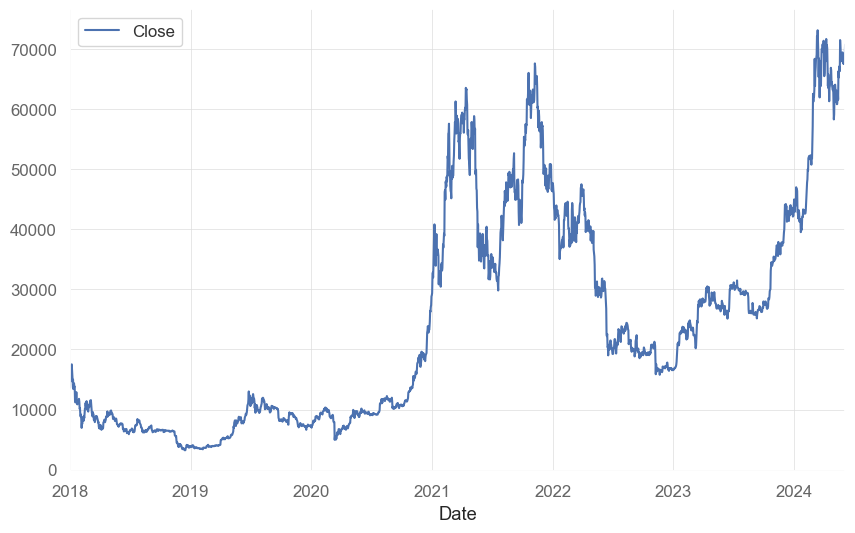

In [9]:
df_btc.plot();

# 3. Metrics Analysis

The quantstats library presents an interesting calculation of the variation of these indices using a rolling function (one semester ~ 126 days) similar to pandas

Here we calculate Sharpe and Sortino ratios considering a risk-free rate of 5% per semester

In [10]:
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values)
sortino_qs = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values)
sharpe_qs.index = df_btc.index
sortino_qs.index = df_btc.index

Let’s look at the correlation between the two indices

In [11]:
fig_corr = go.Figure()

fig_corr.add_trace({'type':'scatter',
                    'x': sharpe_qs,
                    'y': sortino_qs,
                    'mode': 'markers',
                    'line':{'color':'blue'}})

fig_corr.update_layout(template='simple_white', paper_bgcolor="#f7f8fa",
                        margin=dict(l=70, r=20, t=20, b=70),
                        xaxis_title='<b>Sharpe', yaxis_title='<b>Sortino',
                        width=500, height=500)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'mode': 'markers',
              'type': 'scatter',
              'x': array([       nan,        nan,        nan, ..., 2.01041196, 1.95600829,
                          2.09693401]),
              'y': array([       nan,        nan,        nan, ..., 3.32899782, 3.2315811 ,
                          3.47273764])}],
    'layout': {'height': 500,
               'margin': {'b': 70, 'l': 70, 'r': 20, 't': 20},
               'paper_bgcolor': '#f7f8fa',
               'template': '...',
               'width': 500,
               'xaxis': {'title': {'text': '<b>Sharpe'}},
               'yaxis': {'title': {'text': '<b>Sortino'}}}
})

In [12]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('Pearson correlation, r=%.3f' %corr, 'p=%.3f' %p)

Pearson correlation, r=0.990 p=0.000


With such a high correlation, would it be possible to gain any insight by comparing the two risk indicators?

In [13]:
fig = make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = sharpe_qs.index, y = sharpe_qs,
                         name = 'Sharpe', line = dict(color = 'blue', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = sortino_qs.index, y = sortino_qs,
                         name = 'Sortino', line = dict(color = 'red', width = 2)),
              secondary_y = False)

fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']),
                         name = 'log price BTC-USD', line = dict(color = 'black', width = 2)),
              secondary_y = True)

fig.update_yaxes(title_text = 'Risk-adjuste values', secondary_y = False)
fig.update_yaxes(title_text = 'log price BTC-USD', secondary_y = True)
fig.update_layout(title='<b>Sharpe vs Sortino ratios', xaxis_title="<b>Data", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=15,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
                  margin=dict(l=75, r=20, t=70, b=70), legend=dict(orientation="h",yanchor="bottom",y=1,xanchor="right",x=0.4),
                  width=1000,height=500)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue', 'width': 2},
              'name': 'Sharpe',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 2, 0, 0),
                          datetime.datetime(2018, 1, 3, 0, 0), ...,
                          datetime.datetime(2024, 6, 2, 0, 0),
                          datetime.datetime(2024, 6, 3, 0, 0),
                          datetime.datetime(2024, 6, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([       nan,        nan,        nan, ..., 2.01041196, 1.95600829,
                          2.09693401]),
              'yaxis': 'y'},
             {'line': {'color': 'red', 'width': 2},
              'name': 'Sortino',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 2, 0, 0),
                          datetime.datetime(2018, 1, 3, 0, 0), ...,
                          datetime.datetime(2024, 6, 2, 0, 0),
                          datetime.datetime(2024, 6, 3, 0, 0),
                          datetime.datetime(2024, 6, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([       nan,        nan,        nan, ..., 3.32899782, 3.2315811 ,
                          3.47273764]),
              'yaxis': 'y'},
             {'line': {'color': 'black', 'width': 2},
              'name': 'log price BTC-USD',
              'type': 'scatter',
              'x': array([datetime.datetime(2018, 1, 1, 0, 0),
                          datetime.datetime(2018, 1, 2, 0, 0),
                          datetime.datetime(2018, 1, 3, 0, 0), ...,
                          datetime.datetime(2024, 6, 2, 0, 0),
                          datetime.datetime(2024, 6, 3, 0, 0),
                          datetime.datetime(2024, 6, 4, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 9.52202215,  9.61461141,  9.62911649, ..., 11.12360338, 11.13902852,
                          11.16580849]),
              'yaxis': 'y2'}],
    'layout': {'font': {'color': 'black', 'family': 'Arial, Arial, Arial', 'size': 15},
               'height': 500,
               'legend': {'orientation': 'h',
                          'title': {'text': ''},
                          'x': 0.4,
                          'xanchor': 'right',
                          'y': 1,
                          'yanchor': 'bottom'},
               'margin': {'b': 70, 'l': 75, 'r': 20, 't': 70},
               'paper_bgcolor': '#f7f8fa',
               'template': '...',
               'title': {'text': '<b>Sharpe vs Sortino ratios'},
               'width': 1000,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94], 'title': {'text': '<b>Data'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Risk-adjuste values'}},
               'yaxis2': {'anchor': 'x', 'overlaying': 'y', 'side': 'right', 'title': {'text': 'log price BTC-USD'}}}
})